In [106]:
import csv
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
# import matplotlib.patches as mpatches

In [98]:
names = ["columbia", "nso", "philadelphia", "royal", "london", "slovak"]
performances = [ (name, '../output/data/%s.csv' % name) for name in names ]

In [99]:
data = {}
for name in names:
    with open('../output/data/%s.csv' % name, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        data[name] = [ float(r['freq']) for r in reader ];

In [100]:
def getPianoFrequency(key_number):
    return np.power(2, (key_number-49) / 12) * 440

F3 = getPianoFrequency(33)
Bb5 = getPianoFrequency(62)
intermediateNotes = [ getPianoFrequency(f) for f in range(34,62) ]

In [101]:
longestGlissando = max([ len(s) for s in data.values() ])
noteLowest = min([ min(s) for s in data.values() ])
noteHighest = max([ max(s) for s in data.values() ])

In [102]:
N = 6
colors = [hsv_to_rgb([ x * 45 / 360, 1, 1 ]) for x in list(range(N))]

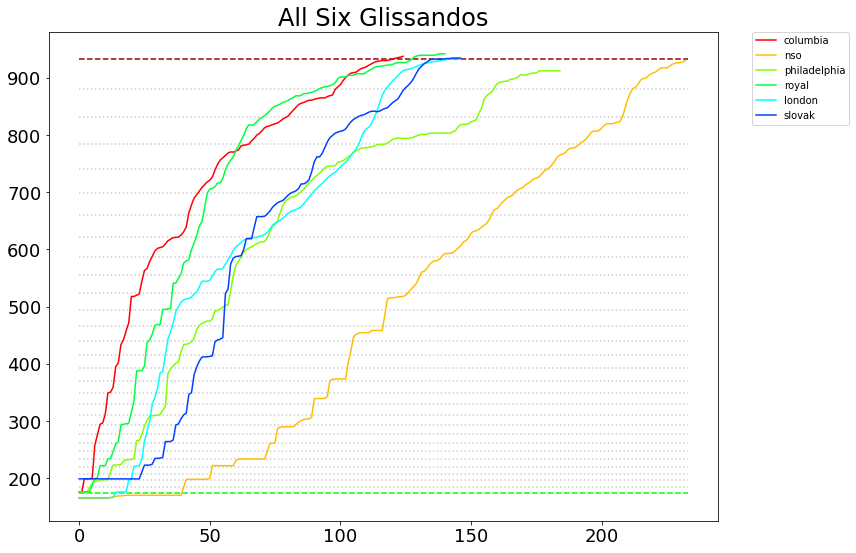

In [103]:
fig = plt.figure(figsize=(12, 9), frameon=True)
plt.title("All Six Glissandos", fontsize=24)
plt.hlines([F3, Bb5], xmin=0, xmax=longestGlissando, linestyles="dashed", colors=["#00FF00", "#990000"])
plt.hlines(intermediateNotes, xmin=0, xmax=longestGlissando, linestyles="dotted", colors="#CCCCCC")
ax = fig.gca()
ax.tick_params(labelsize=18)

for n,name in enumerate(names):
    freqs = data[name]
    ax.plot(list(range(len(freqs))), freqs, color=colors[n], label=name)

lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [104]:
image_path = "../output/images/comparison.png"
fig.savefig(image_path, bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

In [108]:
with open('../output/glissandos.json', 'w') as f:
    json.dump(data, f, ensure_ascii=False)